In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [9]:
# Checking duplicate rows
df.duplicated().sum()

1

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,13279.121487,0.242334,0.272251,0.243082
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656,0.428655,0.445285,0.429104
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


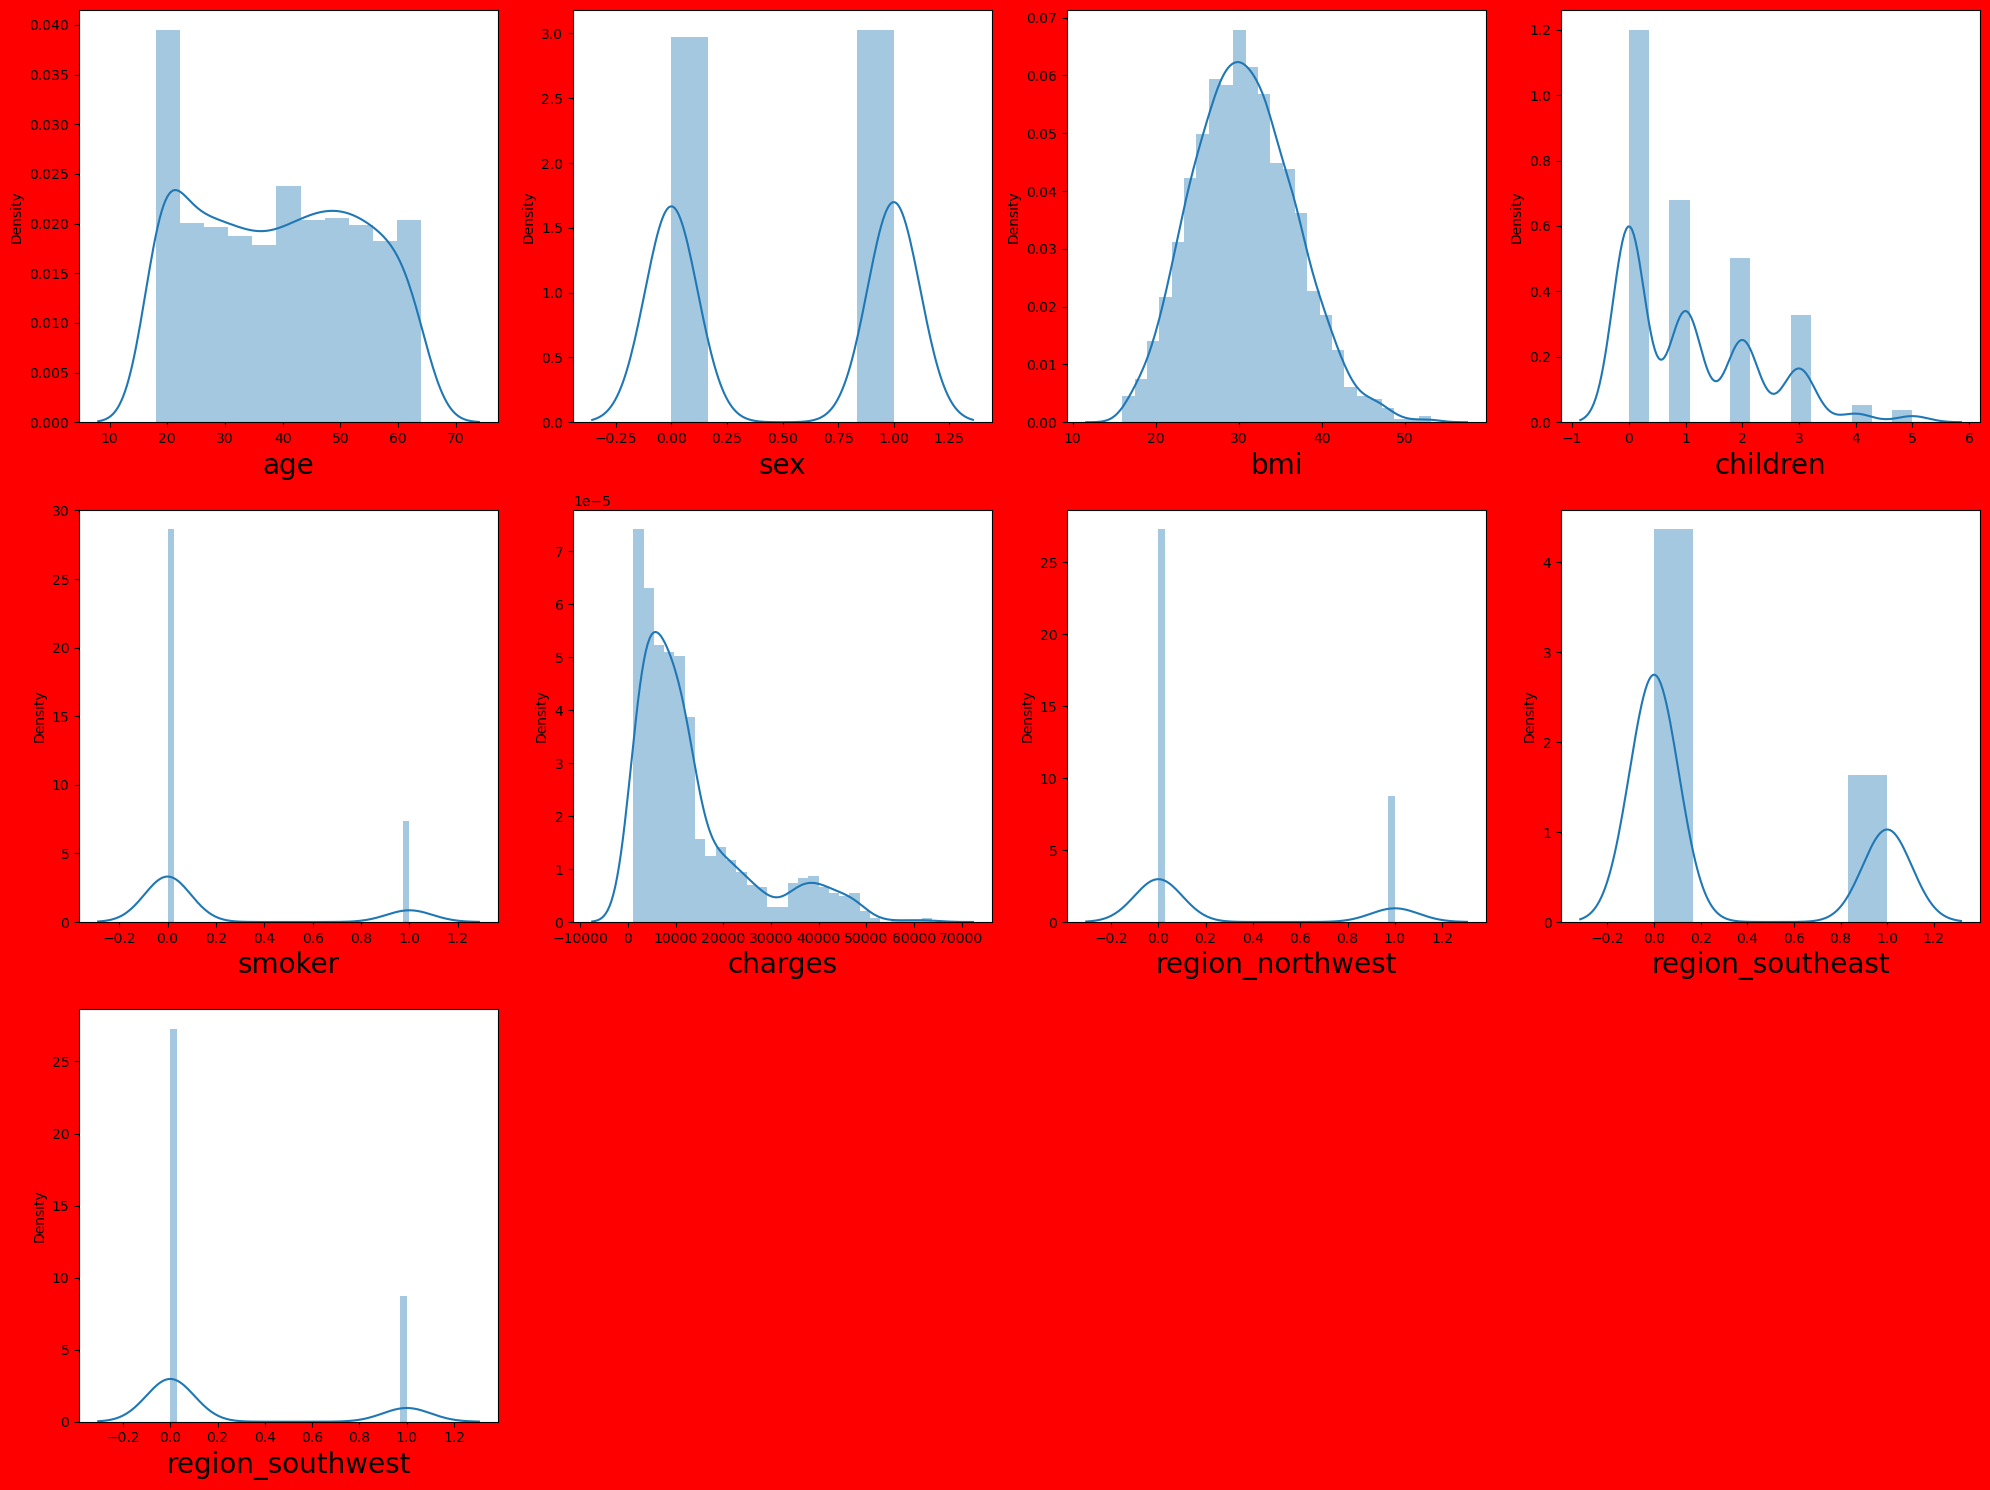

In [13]:
# Checking how data is distributed for every column

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber) 
        sns.distplot(df[column]) 
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()     

In [14]:
df.skew()

age                 0.054781
sex                -0.019469
bmi                 0.283914
children            0.937421
smoker              1.463601
charges             1.515391
region_northwest    1.204009
region_southeast    1.024467
region_southwest    1.199258
dtype: float64

In [15]:
skewed_columns = ['children', 'smoker']

for column in skewed_columns:
    df[column] = np.cbrt(df[column])

In [16]:
df.skew()

age                 0.054781
sex                -0.019469
bmi                 0.283914
children           -0.098682
smoker              1.463601
charges             1.515391
region_northwest    1.204009
region_southeast    1.024467
region_southwest    1.199258
dtype: float64

We have removed skewness. NO need to remove skewness from smoker,region_northwest, region_southeast,region_southwest.

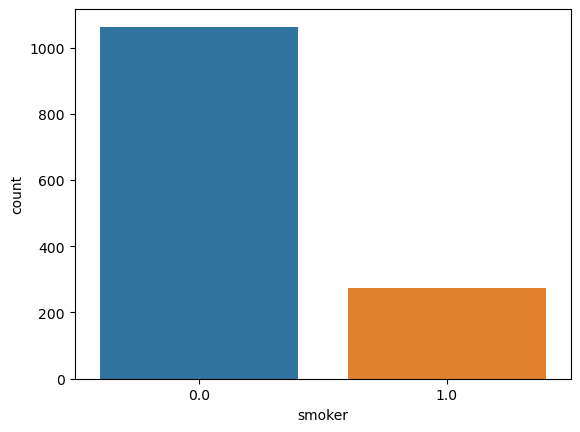

In [17]:
sns.countplot(x='smoker', data=df)
plt.show()

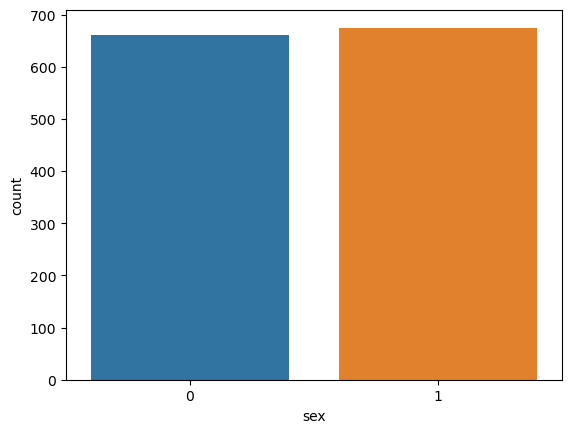

In [18]:
sns.countplot(x='sex', data=df)
plt.show()

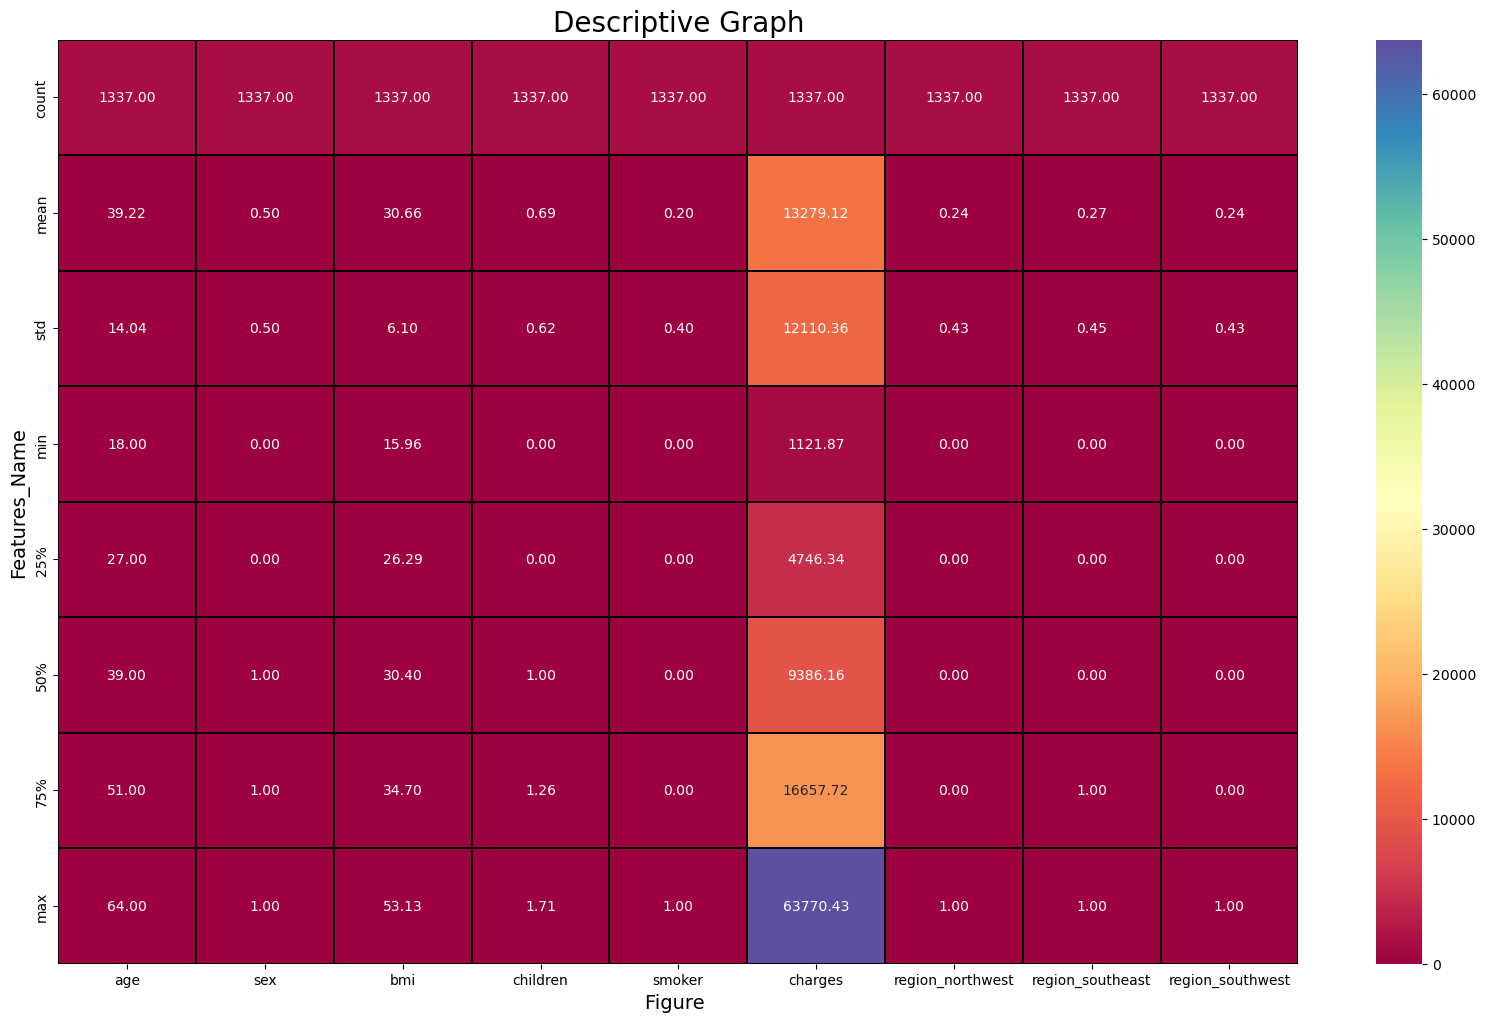

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2,linecolor="black", cmap= 'Spectral') 
plt.xlabel('Figure ', fontsize=14)
plt.ylabel('Features_Name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

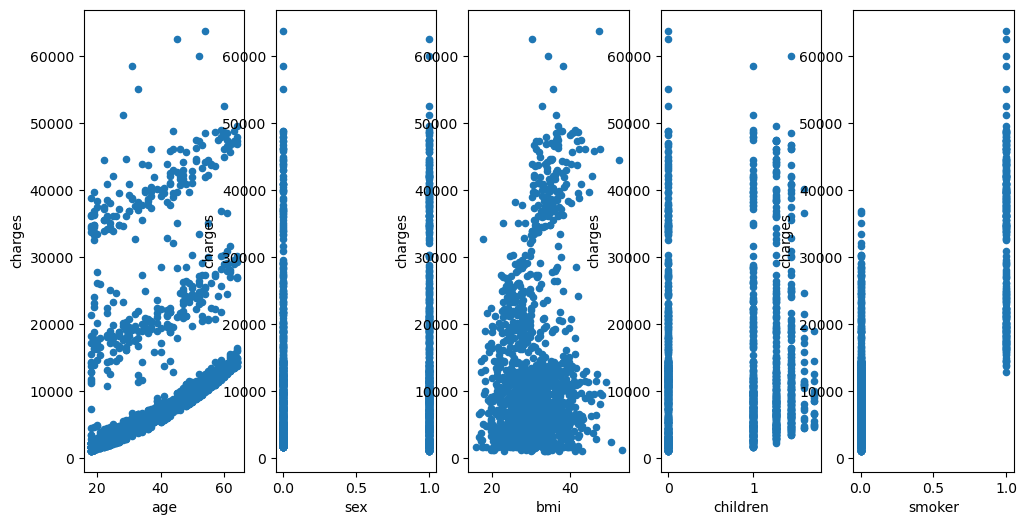

In [20]:
# visualize the relationship between the features and the response using scatterplots 
fig, axs = plt.subplots(1, 5)

df.plot(kind='scatter', x='age', y='charges',ax=axs[0], figsize=(12,6))
df.plot(kind='scatter', x='sex', y='charges',ax=axs[1],) 
df.plot(kind='scatter', x='bmi', y='charges',ax=axs[2],)
df.plot(kind='scatter', x='children', y='charges',ax=axs[3],)
df.plot(kind='scatter', x='smoker', y='charges',ax=axs[4],)


In [21]:
# We will observe the relationship between independent variables and dependent variable.

#Divide data set into features and label
y = df['charges']
X = df.drop(columns = ['charges'])

In [22]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [23]:
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0.00000,1.0,0,0,1
1,18,1,33.770,1.00000,0.0,0,1,0
2,28,1,33.000,1.44225,0.0,0,1,0
3,33,1,22.705,0.00000,0.0,1,0,0
4,32,1,28.880,0.00000,0.0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,1.44225,0.0,1,0,0
1334,18,0,31.920,0.00000,0.0,0,0,0
1335,18,0,36.850,0.00000,0.0,0,1,0
1336,21,0,25.800,0.00000,0.0,0,0,1


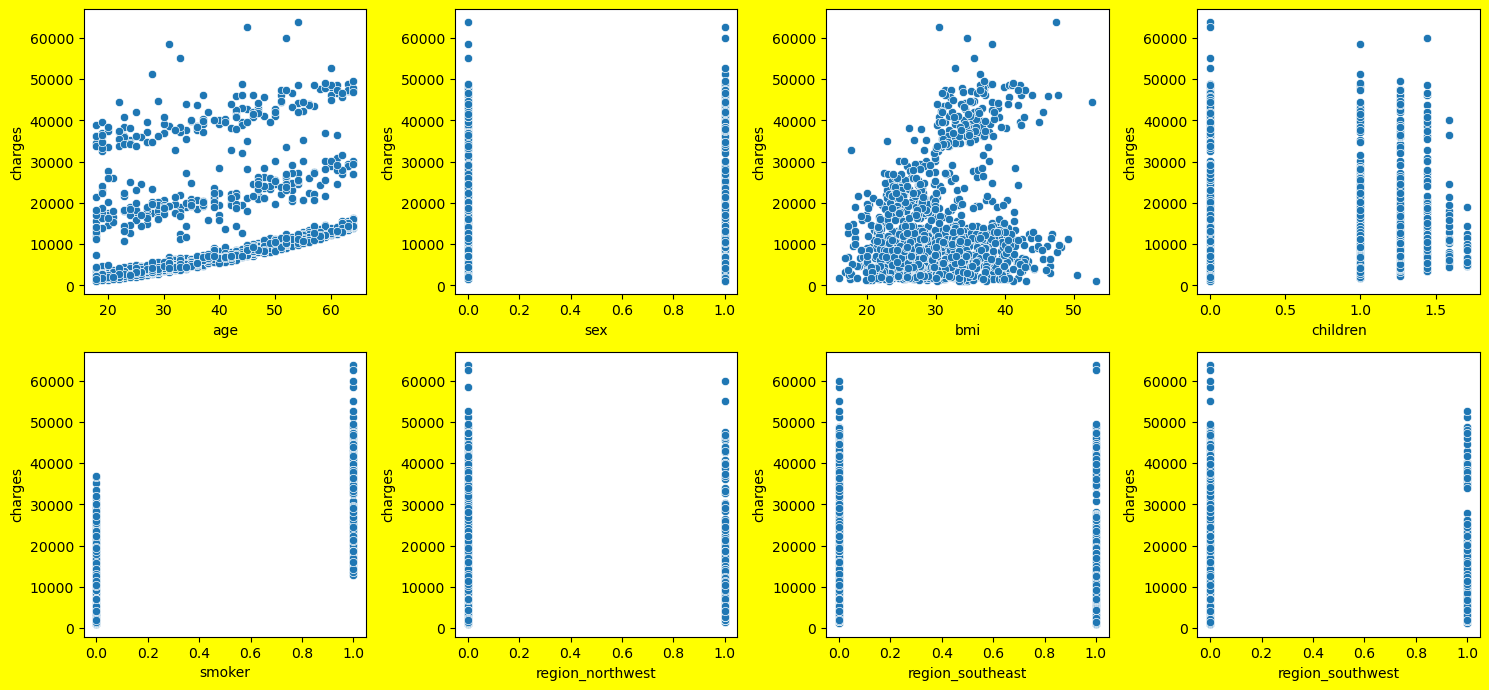

In [25]:
plt.figure(figsize=(15, 10), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 12:  
        ax = plt.subplot(3, 4, plotnumber)
        
        sns.scatterplot(x=X[column], y=y, ax=ax)
        
        plt.xlabel(column, fontsize=10)
        plt.ylabel('charges', fontsize=10)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


In [27]:
 # Data Scaling. Formula Z = (X - mean)/std
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.44041773, -1.00977099, -0.45315959, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [-1.51164747,  0.99032355,  0.50942165, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-0.79935006,  0.99032355,  0.3831546 , ..., -0.5655458 ,
         1.63495472, -0.56669767],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-1.29795825, -1.00977099, -0.79752426, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [ 1.55123139, -1.00977099, -0.26129928, ...,  1.76820338,
        -0.61163774, -0.56669767]])

In [28]:
# Split data into train and test. Model will be built on training data and tested on test data. 
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state=348)
y_train.head()

882      2585.85065
956     41999.52000
1335     1629.83350
865      6600.36100
864      8782.46900
Name: charges, dtype: float64

In [29]:
#Model instantiating and training
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [30]:
df.tail(2)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
1336,21,0,25.80,0.0,0.0,2007.9450,0,0,1
1337,61,0,29.07,0.0,1.0,29141.3603,1,0,0


In [31]:
#Since we have already fit the scaler, you can transform the data
print ('Charges:',regression.predict(scaler.transform([[61, 0, 29.07, 0.0, 1, 1,0, 0]])))

Charges: [36988.73609337]


In [32]:
#saving the model
pickle.dump(regression, open('medical_cost', 'wb'))

In [33]:
# checking how well model fits on train data
# Adjusted R2 score
regression.score(x_train,y_train)

0.7421006828594816

In [34]:
y_pred = regression.predict(x_test)

In [35]:
y_pred

array([ 9.65102941e+03,  2.51297258e+04,  8.23066132e+03,  1.66938829e+04,
        1.31899376e+04,  9.80295323e+03,  2.67983609e+04,  8.09763328e+03,
        2.80344220e+04,  1.17379724e+04,  3.90219898e+03,  4.11732342e+03,
        1.80077624e+04, -7.82795044e+02,  6.06442198e+03,  1.40373735e+04,
        7.81635422e+03,  3.37057904e+04,  1.09302906e+04,  1.22397522e+04,
        1.25281504e+03, -1.64959416e+01,  1.35167199e+04,  5.76672797e+03,
        1.28646167e+04,  4.75259422e+03,  8.93817588e+03,  3.86767098e+03,
        5.29621285e+03,  4.33188522e+03,  2.93512039e+03,  7.80533443e+03,
        6.68292647e+03,  9.70202403e+03,  9.94784183e+03,  3.75809546e+04,
        1.24756328e+04,  8.82945028e+03, -1.80919974e+03,  7.35067623e+02,
        5.14174695e+03,  3.08149666e+04,  7.50463523e+03,  1.20370375e+04,
        3.04441261e+03,  3.35141355e+04,  4.53560033e+03,  1.70195514e+04,
        1.17345830e+04,  3.06776344e+04,  1.30314761e+04,  1.24419841e+04,
        1.22162127e+04,  

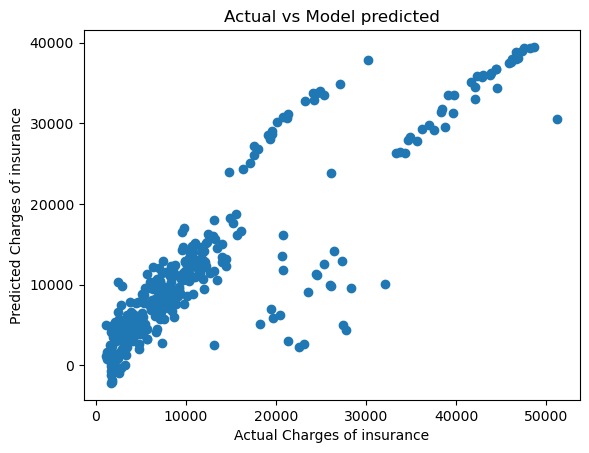

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Charges of insurance')
plt.ylabel('Predicted Charges of insurance')
plt.title('Actual vs Model predicted')
plt.show()

Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
y_pred = regression.predict(x_test)

In [39]:
mean_absolute_error(y_test,y_pred)

4014.4033933034098

In [40]:
mean_squared_error(y_test,y_pred)

34707668.38574563

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

5891.321446479188

In [42]:
#Checking whether data is overfitting or not

In [43]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [44]:
lasscv = LassoCV(alphas = None, max_iter = 10)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [45]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

38.31862161158422

In [46]:
#now that we have best parameter, we will use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=38.31862161158422)

In [47]:
lasso_reg.score (x_test, y_test)

0.7725429809871879

In [48]:
#Using Ridge regression model
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [49]:
# Ridge will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [50]:
ridgecv.alpha_

0.09099999999999998

In [51]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [52]:
ridge_model.score(x_test,y_test)

0.7718301413944606

We got around same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.